# Data Understanding

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-factors' dataset.
Path to dataset files: /kaggle/input/student-performance-factors


In [2]:
print("Files inside:", os.listdir(path))
file_path = os.path.join(path, "StudentPerformanceFactors.csv")
df = pd.read_csv(file_path)

Files inside: ['StudentPerformanceFactors.csv']


In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


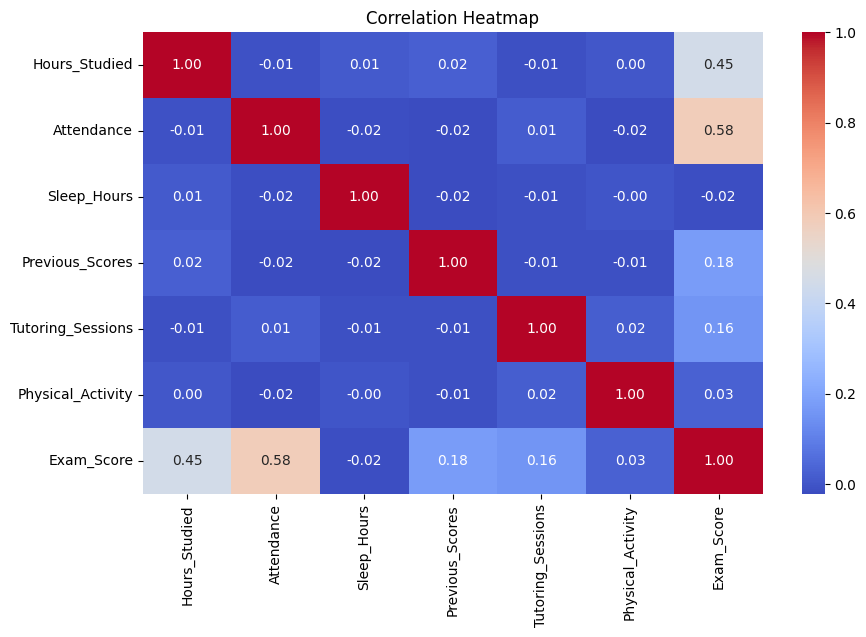

In [7]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

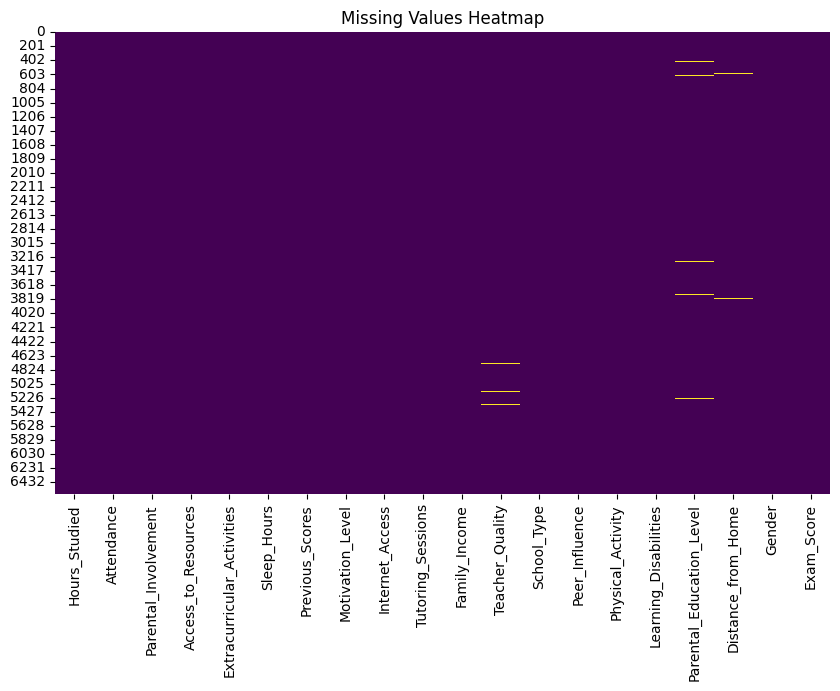

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

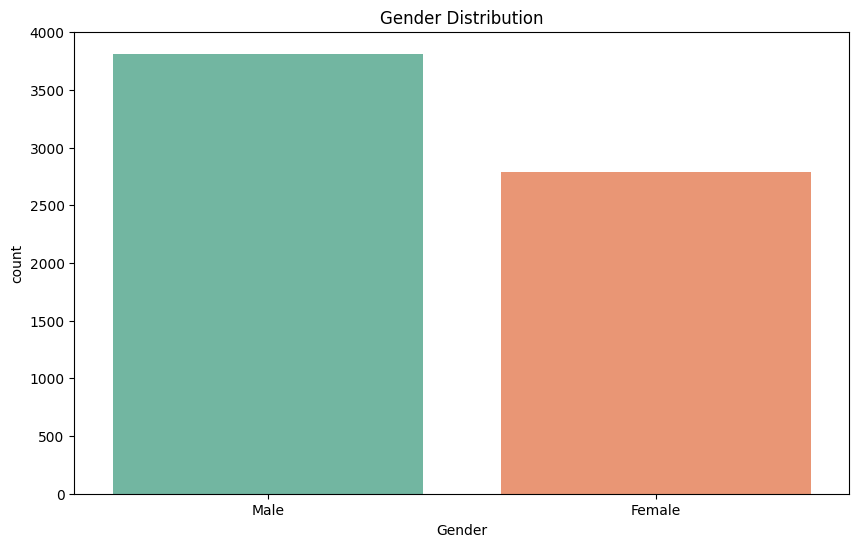

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Gender", palette="Set2")
plt.title("Gender Distribution")
plt.show()

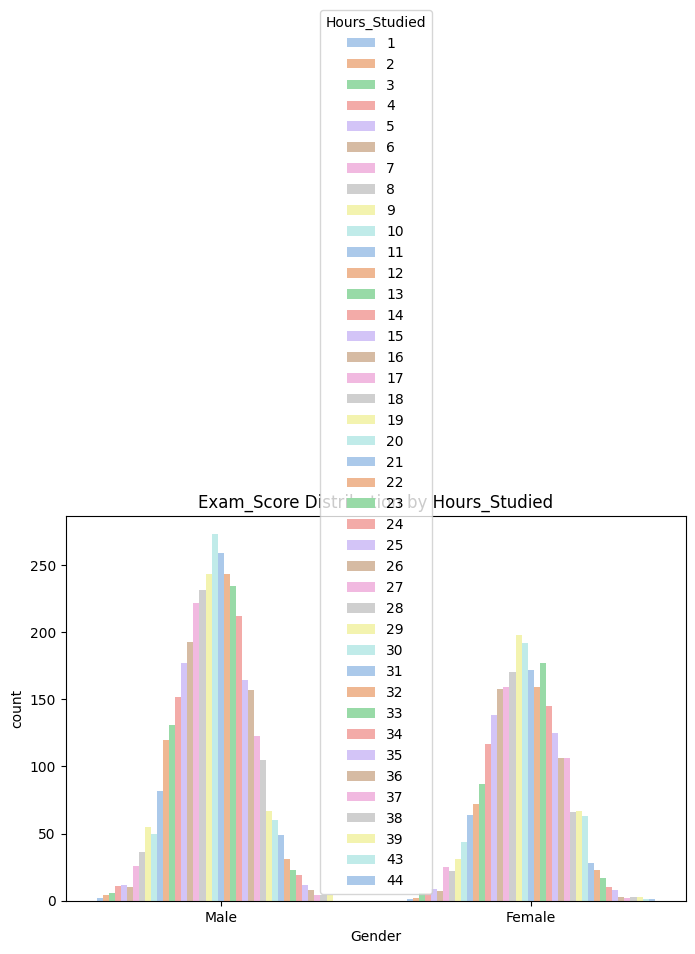

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", hue="Hours_Studied", data=df, palette="pastel")
plt.title("Exam_Score Distribution by Hours_Studied")
plt.show()


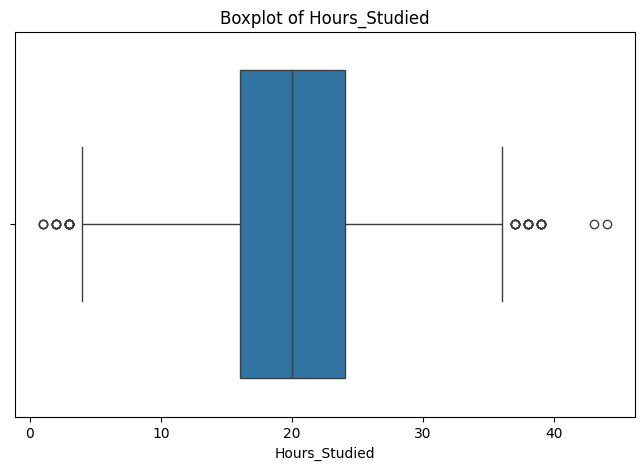

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Hours_Studied"])
plt.title("Boxplot of Hours_Studied")
plt.show()

In [12]:
Q1 = df["Exam_Score"].quantile(0.25)
Q3 = df["Exam_Score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Exam_Score"] < lower_bound) | (df["Exam_Score"] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 104


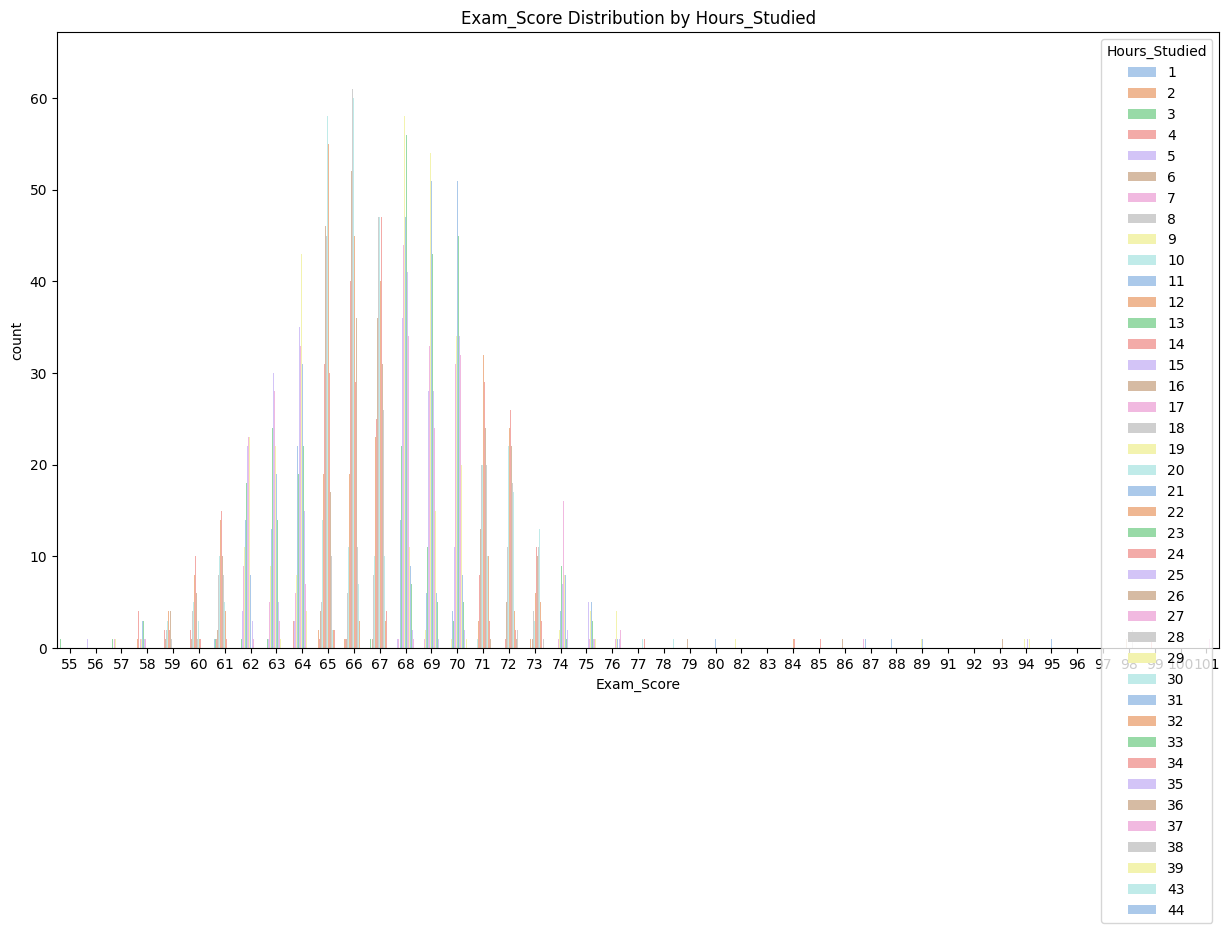

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x="Exam_Score", hue="Hours_Studied", data=df, palette="pastel")
plt.title("Exam_Score Distribution by Hours_Studied")
plt.show()

# Data Preparation

In [14]:
binary_cols = ["Extracurricular_Activities", "Internet_Access", "Learning_Disabilities"]

for col in binary_cols:

    df[col] = df[col].astype(str).str.strip().str.title()

    df[col] = df[col].map({"Yes": 1, "No": 0})

    df[col] = df[col].fillna(0)


In [15]:
ordinal_maps = {
    "Motivation_Level": {"Low": 0, "Medium": 1, "High": 2},
    "Peer_Influence": {"Negative": -1, "Neutral": 0, "Positive": 1},
    "Family_Income": {"Low": 0, "Medium": 1, "High": 2},
    "Distance_from_Home": {"Near": 0, "Moderate": 1, "Far": 2},
    "Parental_Involvement": {"Low": 0, "Medium": 1, "High": 2},
    "Parental_Education_Level": {"None": 0, "High School": 1, "College": 2, "Postgraduate": 3},
    "Teacher_Quality": {"Low": 0, "Medium": 1, "High": 2}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)
    df[col] = df[col].fillna(df[col].median())


In [16]:
df["study_sleep_ratio"] = df["Hours_Studied"] / (df["Sleep_Hours"] + 1)
df["is_high_attendance"] = (df["Attendance"] > 90).astype(int)
df["parent_support_index"] = df["Parental_Involvement"] * df["Parental_Education_Level"]
df["has_resources"] = ((df["Access_to_Resources"] == 1) & (df["Internet_Access"] == 1)).astype(int)
df["activity_score"] = df["Extracurricular_Activities"] + df["Physical_Activity"]
df["score_improvement"] = df["Exam_Score"] - df["Previous_Scores"]
df["is_near_school"] = (df["Distance_from_Home"] < df["Distance_from_Home"].median()).astype(int)
df["attendance_score"] = df["Attendance"] * df["Motivation_Level"]
df["socioeconomic_index"] = df["Family_Income"] * df["Distance_from_Home"]
df["is_low_sleep"] = (df["Sleep_Hours"] < 6).astype(int)
df["is_tutored"] = (df["Tutoring_Sessions"] > 0).astype(int)
df["improvement_ratio"] = df["Exam_Score"] / (df["Previous_Scores"] + 1)
df["health_index"] = df["Physical_Activity"] * df["Sleep_Hours"]
df["study_quality"] = df["Hours_Studied"] * df["Motivation_Level"]

In [17]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [18]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])
nominal_cols = ["School_Type", "Gender"]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Missing values per column:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)

Missing values per column:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Exam_Score                    0
study_sleep_ratio             0
is_high_attendance            0
parent_support_index          0
has_resources                 0
activity_score                0
score_improvement             0
is_near_school                0
attendance_score              0
socioeconomic_index           0
is_low_sleep                  0
is_tutored                    0
improvement_ratio             0
health_index

In [19]:

df["School_Type_Public"] = df["School_Type_Public"].astype(int)
df["Gender_Male"] = df["Gender_Male"].astype(int)
df = pd.get_dummies(df, columns=["Access_to_Resources"], drop_first=True)


In [20]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols] = scaler.fit_transform(df[num_cols])


In [21]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
print(X_train.select_dtypes(include=["object"]).columns)


Index([], dtype='object')


In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


MSE: 1.1521887182733151e-29
RMSE: 3.394390546583164e-15
MAE: 2.7021690482766352e-15
R²: 1.0


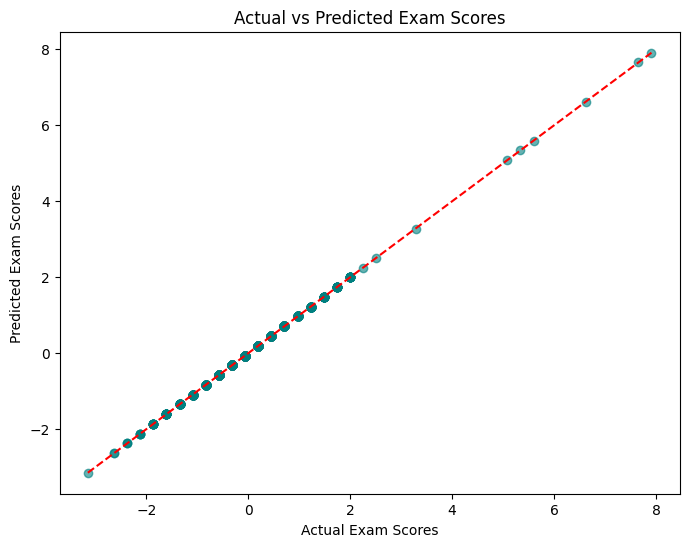

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # خط مثالي
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


In [25]:
poly_reg_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

poly_reg_model.fit(X_train, y_train)
y_pred_poly = poly_reg_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly**0.5
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R²:", r2_poly)

Polynomial Regression RMSE: 1.0294972871559728e-14
Polynomial Regression R²: 1.0


# Evaluation

In [26]:
X_reduced = X.drop(["study_sleep_ratio", "socioeconomic_index"], axis=1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

lin_reg.fit(X_train_r, y_train_r)
y_pred_r = lin_reg.predict(X_test_r)

print("Reduced Features R²:", r2_score(y_test_r, y_pred_r))

Reduced Features R²: 1.0


In [27]:
scores = cross_val_score(lin_reg, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validation R² scores: [1. 1. 1. 1. 1.]
Mean R²: 1.0
